In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk

In [3]:
# data taken directly from kaggle so I can proceed with analysis. Will come back and parse manually.
# https://www.kaggle.com/xhlulu/cord-19-eda-parse-json-and-generate-clean-csv/data?select=clean_pmc.csv 
data = pd.read_csv("Data/clean_pmc.csv")

In [4]:
data.shape

(26505, 9)

In [5]:
data.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,14572a7a9b3e92b960d92d9755979eb94c448bb5,Immune Parameters of Dry Cows Fed Mannan Oligo...,"S T Franklin, M C Newman, K E Newman, K I Meek","S T Franklin (University of Kentucky, 40546-02...",Abstract\n\nThe objective of this study was to...,INTRODUCTION\n\nThe periparturient period is a...,Immune response of pregnant heifers and cows t...,"[{'first': 'S', 'middle': ['T'], 'last': 'Fran...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Immune ..."
1,bb790e8366da63c4f5e2d64fa7bbd5673b93063c,Discontinuous Transcription or RNA Processing ...,"Beate Schwer, Paolo Vista, Jan C Vos, Hendrik ...","Beate Schwer, Paolo Vista, Jan C Vos, Hendrik ...",NaN,Discontinuous\n\nTranscription or RNA Processi...,Poly (riboadenylic acid) preferentially inhibi...,"[{'first': 'Beate', 'middle': [], 'last': 'Sch...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Poly (r..."
2,24f204ce5a1a4d752dc9ea7525082d225caed8b3,NaN,NaN,NaN,NaN,Letter to the Editor\n\nThe non-contact handhe...,Novel coronavirus is putting the whole world o...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Novel c..."
3,f5bc62a289ef384131f592ec3a8852545304513a,Pediatric Natural Deaths 30,"Elizabeth C Burton, Nicole A Singer",Elizabeth C Burton (Johns Hopkins University S...,NaN,"Introduction\n\nWorldwide, the leading causes ...",In athletes who experienced sudden death or in...,"[{'first': 'Elizabeth', 'middle': ['C'], 'last...","{'BIBREF0': {'ref_id': 'b0', 'title': 'In athl..."
4,ab78a42c688ac199a2d5669e42ee4c39ff0df2b8,A real-time convective PCR machine in a capill...,"Yi-Fan Hsieh, Da-Sheng Lee, Ping-Hei Chen, Sha...","Yi-Fan Hsieh (National Taiwan University, 106,...","Abstract\n\nThis research reports the design, ...",Introduction\n\nMullis et al. developed the po...,"The Polymerase Chain Reaction, K B Mullis, F F...","[{'first': 'Yi-Fan', 'middle': [], 'last': 'Hs...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The Pol..."


### Latent Dirichlet Allocation (LDA)

In [6]:
stopwords=set(nltk.corpus.stopwords.words('english'))

In [7]:
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words=stopwords)
data_vectorized = vectorizer.fit_transform(data['text'])

<AxesSubplot:ylabel='word'>

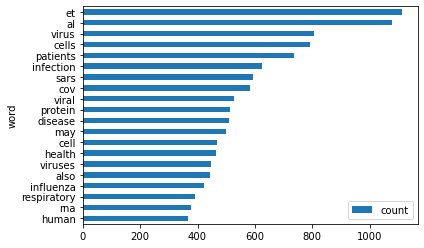

In [8]:
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(data_vectorized.sum(axis=0))[0]})
word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

In [9]:
lda = LatentDirichletAllocation(n_components=10)
lda.fit_transform(data_vectorized)

array([[0.00837683, 0.00837683, 0.00837683, ..., 0.00837683, 0.00837683,
        0.00837686],
       [0.00647861, 0.00647824, 0.00647824, ..., 0.00647824, 0.00647824,
        0.00647833],
       [0.01170817, 0.01170817, 0.01170817, ..., 0.01170817, 0.01170817,
        0.01170817],
       ...,
       [0.00601051, 0.00601051, 0.00601051, ..., 0.00601051, 0.00601051,
        0.88054162],
       [0.00530379, 0.00530379, 0.00530379, ..., 0.00530379, 0.00530379,
        0.00530379],
       [0.00921366, 0.00921366, 0.00921366, ..., 0.00922699, 0.00921366,
        0.00921366]])

In [10]:
# vectorizer.get_feature_names()[456789]
len(lda.components_)

10

In [11]:
# taken from https://www.kaggle.com/danielwolffram/topic-modeling-finding-related-articles#Latend-Dirichlet-Allocation
for topic_idx, topic in enumerate(lda.components_):
    feature_names = vectorizer.get_feature_names()
    message = f'\nTopic {topic_idx + 1}: '
    message += " ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
    print(message)


Topic 1: apod fvm04 nanotrap s450 cdc12 ehpnt thnt fagp aex pdvac

Topic 2: ebcv rhpiv2 fan1 bw001 shsp srr7 scmc padpr nanolipoplexes tk9

Topic 3: m826 cakov lrg mimicyp hr212 vt2y hr121 mphi prostasin rps25

Topic 4: de la en les des que el une un los

Topic 5: een het de van en bij voor zijn op niet

Topic 6: epac epac1 n195 castv peav bsmab cakv siba epac2 hspcft

Topic 7: et al virus cells patients infection sars cov viral protein

Topic 8: srfbp1 nvhap rlasota nvp018 vsels fifn mgrn1 onfh ithrcs dcr3

Topic 9: di svrna della dei che delle sono piu svrnas mvtt

Topic 10: und der die bei eine mit ist von werden zu


In [ ]:
# TODO: remove non-english papers and plot output for context

In [12]:
from langdetect import detect
import re
from tqdm import tqdm
tqdm.pandas()

In [22]:
data_cleaned = data[data['text'].apply(lambda x: bool(re.match('.*[a-zA-Z]+', x)))]

In [25]:
lang = data_cleaned['text'].progress_apply(detect)

100%|██████████| 17526/17526 [31:45<00:00,  9.20it/s] 


In [34]:
data_eng = data_cleaned[lang == 'en']
print('Rows before removing non-english:', data_cleaned.shape[0])
print('Rows after removing non-english:', data_eng.shape[0])

Rows before removing non-english: 17526
Rows after removing non-english: 17045


In [13]:
# for loop that uses try/except to overcome error
# that detect() throws if no alpha characters are present
data_sample = data[:100]
pred_langs=[]
for index, row in data_sample.iterrows():
    try:
        detect(row['text'])
    except:
        pred_lang = 'unknown'
    else:
        pred_lang = detect(row['text'])
    pred_langs.append(pred_lang)

In [15]:
# Function that uses try/except that can be used in pd.apply()
# in the hope this is quicker than pd.iterrows(). Although this
# was the case the difference was trivial.
def detect_lang(text):
    try:
        detect(text)
    except:
        pred_lang = 'unknown'
    else:
        pred_lang = detect(text)
    return pred_lang